Exercise Class - Quantum Information Theory SS 2019 <br>
Lehrstuhl für Theoretische Informationstechnik <br>
G. Janßen <gisbert.janssen@tum.de> <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Qubit Examples

This worksheet aims visualizes some qubit examples of quantum states and channels.  

## Quantum states in two dimensions - Bloch sphere

The convex set of density matrices on a two-dimensional (complex) euclidean space (a.k.a. "qubit states") is nicely depicted in terms of its Bloch ball.

We first define the Pauli-matrices $\sigma_0, \dots, \sigma_3$

In [3]:
sigma_0 = [[1, 0], [0, 1]] 
sigma_1 = [[0, 1], [1, 0]]
sigma_2 = [[0, -1j], [1j, 0]]
sigma_3 = [[1, 0], [0, -1]]

The following two functions are interconverting 2x2 density matrices to their Bloch vector or the other other way around respectively

In [64]:
def bloch_vector(d_matrix):
    """ Calculate the bloch vector for given 2x2 density matrix 'd_matrix'
    """
    r_1 = np.trace(np.matmul(sigma_1, d_matrix))
    r_2 = np.trace(np.matmul(sigma_2, d_matrix))
    r_3 = np.trace(np.matmul(sigma_3, d_matrix))
    return np.real(r_1), np.real(r_2), np.real(r_3)

In [5]:
def d_matrix(b_vector):
    """ Calculates density matrix belonging to bloch vector 'b_vector'
    """
    x = b_vector
    return 0.5 * np.matrix([[1 + x[2], x[0] - 1j * x[1]],[x[0] + 1j * x[1], 1 - x[2]]])

## Plotting Bloch vectors 

In this section we aim provide the routines to print Bloch ball representations of density matrices. A tutorial for 3d plotting with matplotlib can be found at [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Make data

# Set grid in polar angle coordinates
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)

# Generate cartesian coordinates of grid points on the Bloch sphere
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

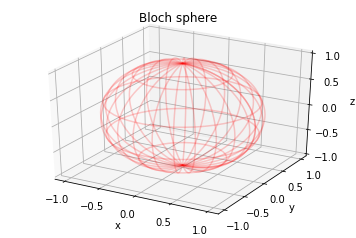

In [52]:
# Generate plot of the Bloch sphere

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface

#ax.plot_surface(0.5 * x, 0.5 * y, 0.5 * z, color='g')
ax.plot_wireframe(x, y, z, rstride=2, cstride=10, color='r', alpha=0.2)
#ax.plot_surface(x_2, y_2, z_2, color='g')
tlevels = [-1, -0.5, 0, 0.5, 1]
ax.set_xticks(tlevels)
ax.set_yticks(tlevels)
ax.set_zticks(tlevels)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Bloch sphere")
plt.show()



In [9]:
def plot_blvectors(x_coords, y_coords, z_coords):
    """ Plots Bloch vectors as points into the Bloch ball 
        
        Arguments: x_coords, y_coords, z_coords are arrays collecting the coordinates of the vectors to print. 

    """
    # Generate plot of the Bloch sphere

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    #ax.plot_surface(0.5 * x, 0.5 * y, 0.5 * z, color='g')
    ax.plot_wireframe(x, y, z, rstride=2, cstride=10, color='r', alpha=0.2)
    ax.scatter3D(x_coords, y_coords, z_coords, color='b' )
    #ax.plot_surface(x_2, y_2, z_2, color='g')
    tlevels = [-1, -0.5, 0, 0.5, 1]
    ax.set_xticks(tlevels)
    ax.set_yticks(tlevels)
    ax.set_zticks(tlevels)
    plt.title("Bloch sphere")
    plt.show()
    

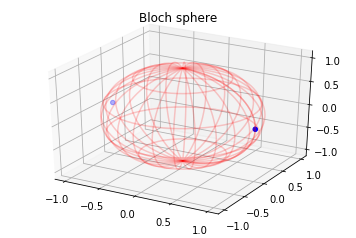

In [10]:
plot_blvectors([1, -1], [0, 0], [0, 0])

## Channel Examples

In [11]:
def channel_action(kraus_ops, density_matrix, dim=2):
    """ Calculates the image of a density matrix 'density_matrix' after action of a channel given by a list 'krausops' 
    of Kraus matrices. 
    """
    l = len(kraus_ops)
    a = np.zeros_like(kraus_ops[0])
    for i in range(l):
        x = np.matmul(np.matmul(kraus_ops[i], density_matrix), kraus_ops[i].conj().T)
        a = np.add(a, x)
    return a

### Bit flip channel

In [12]:
def kraus_bitfl(prob):
    """ Generates a vector with the Kraus matrices of the qubit bitflip channel with flip probability 'prob'
    """
    e_0 = np.multiply(np.sqrt(prob), sigma_0)
    e_1 = np.multiply(np.sqrt(1 - prob), sigma_1)
    return e_0, e_1

### Depolarizing channel

In [13]:
def depol_channel(prob):
    """ Generates an array with the Kraus matrices of the qubit depolarizing channel with depolarization probability 
        'prob'
    """
    k = np.sqrt(prob/2)
    e_0 = np.multiply(np.sqrt(1-prob), sigma_0)
    e_1 = np.multiply(k, np.outer([1,0],[1,0]))
    e_2 = np.multiply(k, np.outer([1,0],[0,1]))
    e_3 = np.multiply(k, np.outer([0,1],[1,0]))
    e_4 = np.multiply(k, np.outer([0,1],[0,1]))
    return e_0, e_1, e_2, e_3, e_4

### Phase flip channel

In [14]:
def phase_fl(prob):
    """ Generates a vector with the Kraus matrices of the qubit phase-flip channel with flip probability 'prob'
    """
    e_0 = np.multiply(np.sqrt(prob), sigma_0)
    e_1 = np.multiply(np.sqrt(1 - prob), sigma_2)
    return e_0, e_1

### Bit-phase flip channel

In [15]:
def bitphase_fl(prob):
    """ Generates a vector with the Kraus matrices of the qubit bit-phase flip channel with flip probability 'prob'
    """
    e_0 = np.multiply(np.sqrt(prob), sigma_0)
    e_1 = np.multiply(np.sqrt(1 - prob), [[0, -1j*np.sqrt(1-prob)],[1j*np.sqrt(1-prob), 0]])
    return e_0, e_1

### Phase damping channel

In [16]:
def ampl_damp(prob, gamma):
    """ Generates a vector with the Kraus matrices of the amplitude damping channel with parameters prob, gamma to be 
        between 0 and 1.
    """
    e_0 = np.multiply(np.sqrt(prob), [[1, 0],[0, np.sqrt(1-gamma)]])
    e_1 = np.multiply(np.sqrt(prob), [[0, np.sqrt(gamma)],[0, 0]])
    e_2 = np.multiply(np.sqrt(1- prob), [[np.sqrt(1-gamma), 0],[0, 1]])
    e_3 = np.multiply(np.sqrt(1 - prob), [[0, 0],[np.sqrt(gamma), 0]])
    return e_0, e_1

## Generate Channel Pictures

Instead of plotting Bloch vectors as points in the Bloch ball, we now display the image of Qubit channels as point sets (in particular subsets of the Bloch sphere). By 'image' we mean the set of all output Bloch vectors which arise from input density matrices from $\mathcal{S}(C^2)$

In [59]:
def plot_channel_im(krausmat, titletext="Channel image"):

    # Generate data for ploting of the Bloch sphere
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    xout = np.empty((50,50))
    yout = np.empty((50,50))
    zout = np.empty((50,50))

    for i in range(50):
        for j in range(50):
            #den = bloch_vector(channel_action(kraus_bitfl(0.3), d_matrix([x[i, j], y[i, j], z[i ,j]])))
            den = bloch_vector(channel_action(krausmat, d_matrix([x[i, j], y[i, j], z[i ,j]])))
            xout[i, j] = den[0]
            yout[i, j] = den[1]
            zout[i, j] = den[2]
           
    # Plot the surface
    ax.plot_wireframe(x, y, z, rstride=2, cstride=10, color='r', alpha=0.2)
    ax.plot_wireframe(xout, yout, zout, rstride=2, cstride=10, color='g')
    tlevels = [-1, -0.5, 0, 0.5, 1]
    ax.set_xticks(tlevels)
    ax.set_yticks(tlevels)
    ax.set_zticks(tlevels)
    plt.title(titletext)
    plt.show()

## Example Plots of Channel Images

Using the functions from the preceding paragraphs, we are finally ready to display some plots of certain example channels. 

#### Bit flip channel

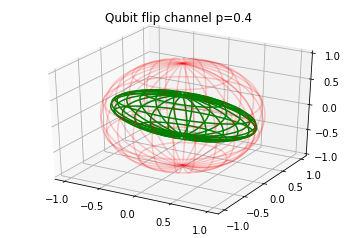

In [65]:
plot_channel_im(kraus_bitfl(0.3), "Qubit flip channel p=0.4")

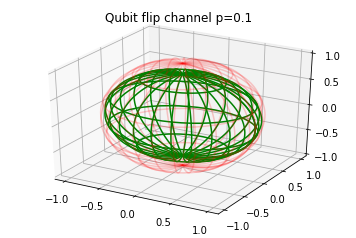

In [66]:
plot_channel_im(kraus_bitfl(0.1), "Qubit flip channel p=0.1")

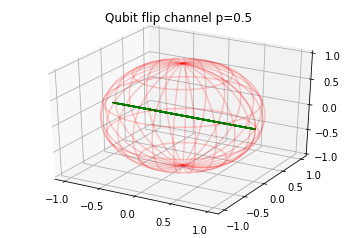

In [67]:
plot_channel_im(kraus_bitfl(0.5), "Qubit flip channel p=0.5")

#### Qubit depolarizing channel

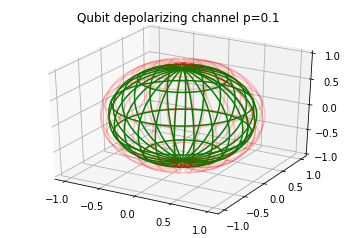

In [68]:
plot_channel_im(depol_channel(0.1), "Qubit depolarizing channel p=0.1")

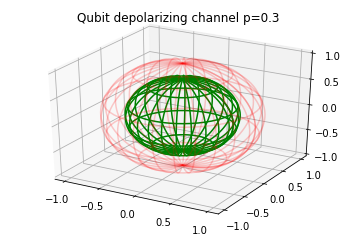

In [69]:
plot_channel_im(depol_channel(0.3), "Qubit depolarizing channel p=0.3")

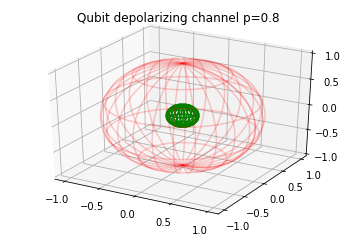

In [70]:
plot_channel_im(depol_channel(0.8), "Qubit depolarizing channel p=0.8")

### Qubit phase flip channel

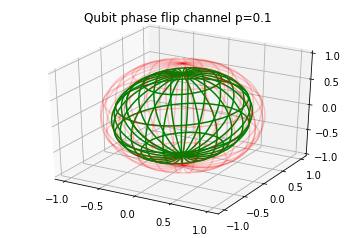

In [71]:
plot_channel_im(phase_fl(0.1), "Qubit phase flip channel p=0.1")

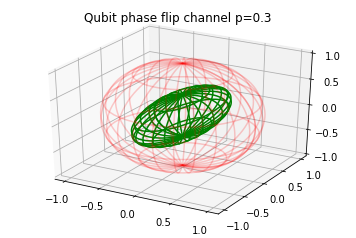

In [72]:
plot_channel_im(phase_fl(0.3), "Qubit phase flip channel p=0.3")

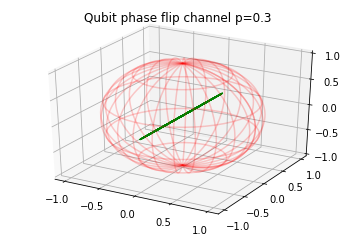

In [73]:
plot_channel_im(phase_fl(0.5), "Qubit phase flip channel p=0.3")

### Qubit bitp-phase flip chanel

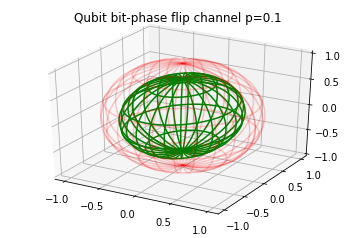

In [74]:
plot_channel_im(bitphase_fl(0.1), "Qubit bit-phase flip channel p=0.1")

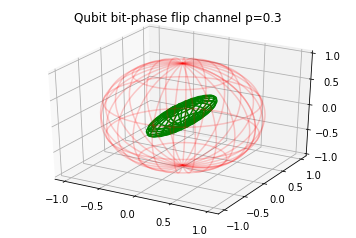

In [75]:
plot_channel_im(bitphase_fl(0.3), "Qubit bit-phase flip channel p=0.3")

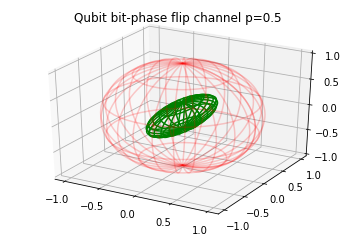

In [76]:
plot_channel_im(bitphase_fl(0.5), "Qubit bit-phase flip channel p=0.5")

### Amplitude damping channel

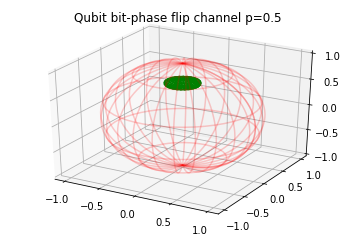

In [77]:
plot_channel_im(ampl_damp(0.7, 0.9), "Qubit bit-phase flip channel p=0.5")

# Visualisation for the Bloch vectors in Exercise Sheet 5, Exercise 4

In [79]:
# Define state vectors given in the Exercise
psi_0 = [1,0]
psi_1 = [np.cos(2*np.pi/3), np.sin(2*np.pi/3)]
psi_2 = [np.cos(4*np.pi/3), np.sin(4*np.pi/3)]

# Calculate the corresponding pure states
rho_0 = np.outer(psi_0, psi_0)
rho_1 = np.outer(psi_1, psi_1)
rho_2 = np.outer(psi_2, psi_2)

# Calculate the Bloch vectors of the states
v_0 = bloch_vector(rho_0)
v_1 = bloch_vector(rho_1)
v_2 = bloch_vector(rho_2)

In [80]:
v_0, v_1, v_2

((0, 0.0, 1),
 (-0.8660254037844384, 0.0, -0.5000000000000003),
 (0.8660254037844392, 0.0, -0.4999999999999991))

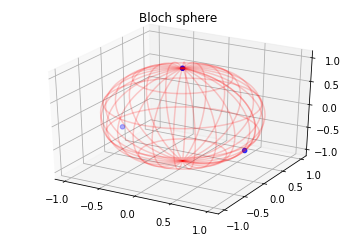

In [81]:
plot_blvectors([v_0[0], v_1[0], v_2[0]], [v_0[1], v_1[1], v_2[1]], [v_0[2], v_1[2], v_2[2]])